## Analyzing Risk Premium During Conflict Events

Intuitively, we know that **risk premiums tend to increase during crises**, particularly during wartime, as uncertainty leads investors to demand higher returns. However, we aim to explore this relationship in greater depth. Specifically, we analyze how risk premiums behave **before**, **during**, and **after** the following key conflict-related events:

- **Israel attacks Iran** — *2025-06-13*
- **USA attacks Iran** — *2025-06-22*
- **Ceasefire** — *2025-06-24*

To conduct this analysis, we focus on **natural gas** and **crude oil**, as they are highly sensitive to geopolitical developments, particularly in the Middle East—a region critical to our global energy supply.

For natural gas, we select TTF=F, and for crude oil, BZ=F. I will extract their price data using the yfinance library.

### Questions
1. Do risk premiums spike immediately after the attacks, or are they priced in beforehand due to market efficiency?
2. Do risk premiums vary depending on the conflict? Which types of conflicts tend to cause larger increases in risk premiums?

***

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


ValueError: x and y must have same first dimension, but have shapes (14,) and (11, 1)

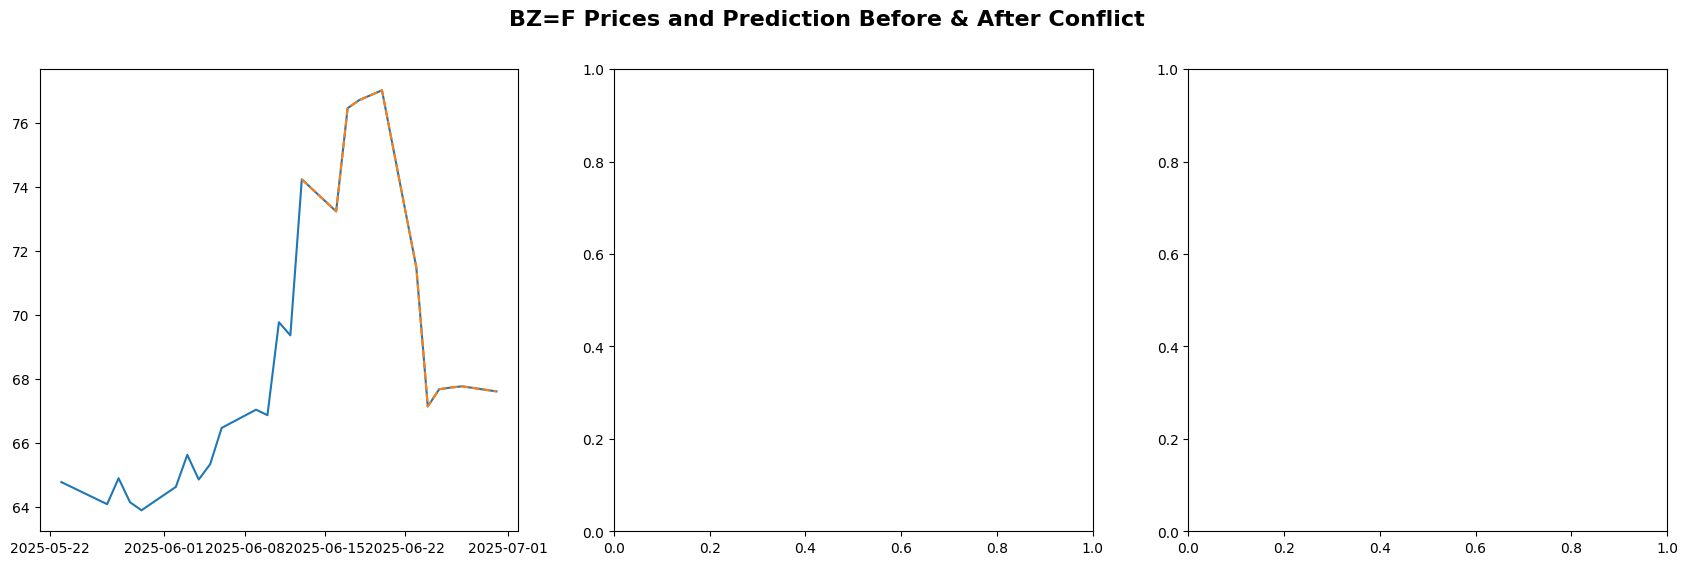

In [1]:
from src.analyze_conflict import analyze_and_plot
tickers = ["BZ=F", "TTF=F"]
for i in tickers:
    df,fig = analyze_and_plot(i, 21) 

***